Google stock price prediction using Facebook Prophet algorithm. This algorithm is used in the applications of time series forecasting, specially when there is a possibility of seasonal effects.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pandas_datareader as web
import warnings

# install facebook prophet
!pip install prophet
import prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 81 kB 3.7 MB/s 
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5


Import dataset. This dataset was collected from Yahoo Finance

In [4]:
from google.colab import files
uploaded = files.upload()

Saving GOOG.csv to GOOG.csv


In [5]:
data = pd.read_csv("GOOG.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-08-09,1197.989990,1203.880005,1183.603027,1188.010010,1188.010010,1065700
1,2019-08-12,1179.209961,1184.959961,1167.671997,1174.709961,1174.709961,1003000
2,2019-08-13,1171.459961,1204.780029,1171.459961,1197.270020,1197.270020,1294400
3,2019-08-14,1176.310059,1182.300049,1160.540039,1164.290039,1164.290039,1578700
4,2019-08-15,1163.500000,1175.839966,1162.109985,1167.260010,1167.260010,1218700


Visualize the data

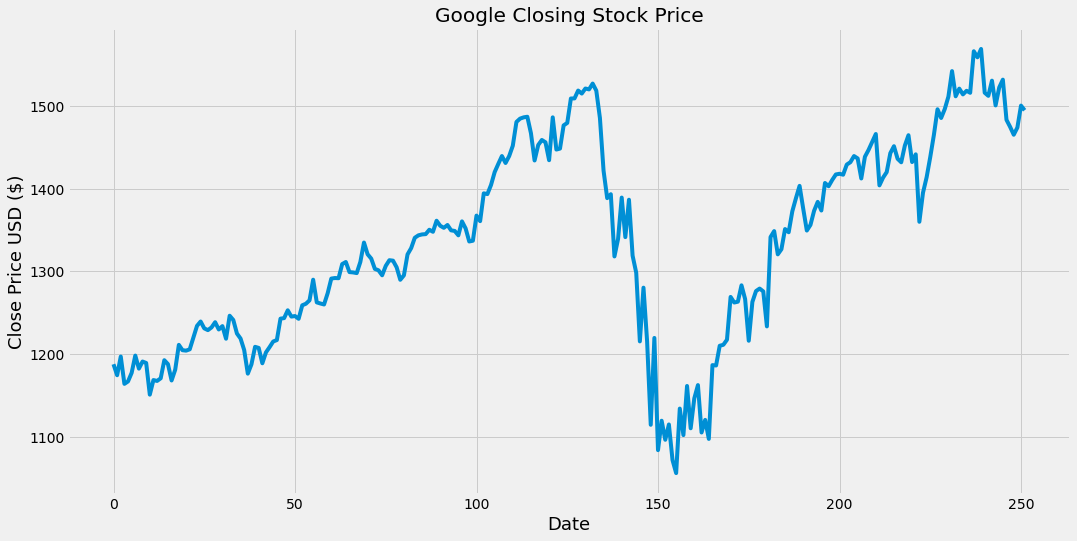

In [6]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(16,8))
plt.title("Google Closing Stock Price")
plt.plot(data["Close"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.show()

Only two features are needed from the dataset that is Date and Close Prices. So let’s prepare the data for the model---

In [7]:
data = data[["Date","Close"]] 
data = data.rename(columns = {"Date":"ds","Close":"y"})
data.head()

,ds,y
0,2019-08-09,1188.010010
1,2019-08-12,1174.709961
2,2019-08-13,1197.270020
3,2019-08-14,1164.290039
4,2019-08-15,1167.260010


In [ ]:
Now let’s fit the data to the Facebook Prophet model for stock price prediction of Google---

In [8]:
from prophet import Prophet
m = Prophet(daily_seasonality=True)
m.fit(data)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj_6f0lql/9efwokc9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj_6f0lql/vgsh9vez.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92808', 'data', 'file=/tmp/tmpj_6f0lql/9efwokc9.json', 'init=/tmp/tmpj_6f0lql/vgsh9vez.json', 'output', 'file=/tmp/tmpj_6f0lql/prophet_model0pboyioo/prophet_model-20221122215905.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:59:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:59:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Now let’s have a look at the stock price prediction made by the model---

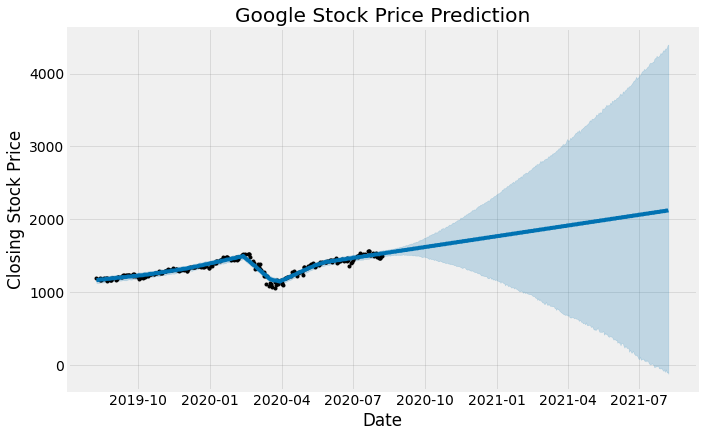

In [9]:
future = m.make_future_dataframe(periods=365)
predictions=m.predict(future)
m.plot(predictions)
plt.title("Google Stock Price Prediction")
plt.xlabel("Date")
plt.ylabel("Closing Stock Price")
plt.show()

let’s have a look at the seasonal affects on this prediction that is made by the model---

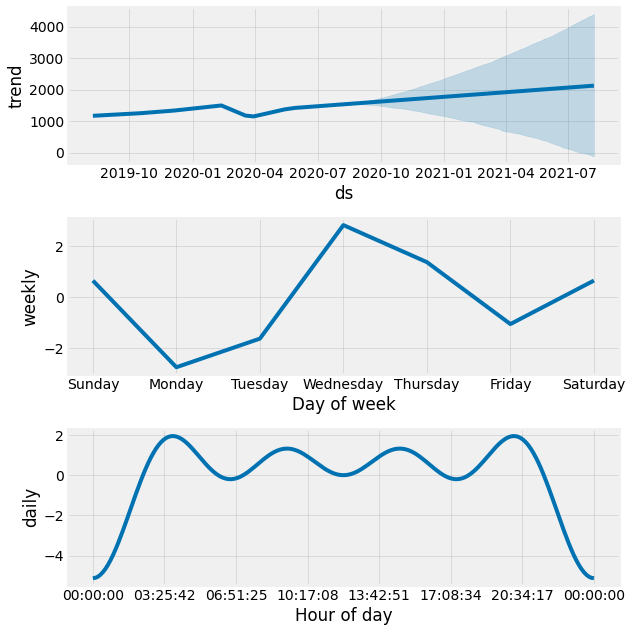

In [10]:
m.plot_components(predictions)
plt.show()